# Intra and Cloud Flare latency test

### Imports

In [119]:
import requests  # type: ignore
import time
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore
import seaborn as sns  # type: ignore
import concurrent.futures
from functools import partial
from datetime import datetime
import threading
from scipy.stats import norm  # type: ignore

from copy import copy

### Main function that performs multiple requests by evaluating the latency of an API

In [120]:
def test_api_performance(url, barrier, num_requests=10, timeout=0.5):
    response_times = []
    print(f"{datetime.now()} - Starting thread execution")

    for i in range(num_requests):
        barrier.wait()
        request_start_time = time.time()
        print(f"{datetime.now()} - Request {i+1}")

        try:
            response = requests.get(url, verify='cacert.pem', timeout=timeout)
            request_end_time = time.time()

            elapsed_time = request_end_time - request_start_time
            response_times.append(elapsed_time)

            # print(f"{datetime.now()} - Request {i+1}: Response time = {elapsed_time:.4f} seconds, HTTP Status = {response.status_code}")

        except requests.exceptions.Timeout:
            print(f"{datetime.now()} - Request {i +
                  1}: Timed out after {timeout * 1000} ms")

        except requests.exceptions.RequestException as e:
            print(f"{datetime.now()} - Request {i+1}: Failed with error {e}")

    return response_times

### Functions to plot graphs about response time

In [121]:
def plot_histogram(response_times, dictionary):
    plt.figure(figsize=(10, 6))
    colors = ["blue", "red"]
    i = 0
    names = list(dictionary)
    for response_time in response_times:
        plt.hist([response*1000 for response in response_time], bins=10, alpha=0.5,
                 label=names[i], color=colors[i])
        i += 1

    plt.xlabel('Response Time (ms)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Response Times')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_boxplot(response_times, dictionary):
    names = list(dictionary)
    plt.figure(figsize=(8, 6))
    plt.boxplot([[response*1000 for response in response_time] for response_time in response_times], tick_labels=names)
    plt.ylabel('Response Time (ms)')
    plt.title('Boxplot of Response Times')
    mean = []
    i = 0
    for response_time in response_times:
        mean.append(np.round(np.mean([response*1000 for response in response_time])))
        plt.figtext(1, (8-i*0.5)/10, names[i] + " : median " + str(np.round(np.median([response*1000 for response in response_time])))
                    + " / mean " + str((np.round(np.mean([response*1000 for response in response_time])))))
        i += 1
    plt.grid(True)
    plt.show()


def plot_cdf(response_times, dictionary):
    names = list(dictionary)
    colors = ["blue", "red"]
    i = 0
    plt.figure(figsize=(10, 6))
    for response_time in response_times:
        sorted_times = np.sort(response_time)
        cdf = np.arange(len(sorted_times)) / float(len(sorted_times))
        plt.plot([sorted_time*1000 for sorted_time in sorted_times], cdf,
                 label=names[i], color=colors[i])
        i += 1
    plt.xlabel('Response Time (ms)')
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function (CDF) of Response Times')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_time_series(response_times, dictionary):
    plt.figure(figsize=(10, 6))
    colors = ["blue", "red"]
    names = list(dictionary)
    i = 0
    for response_time in response_times:
        plt.plot([response*1000 for response in response_time], marker='o', linestyle='-',
                 label=names[i], color=colors[i])
        i += 1
    plt.xlabel('Request Number')
    plt.ylabel('Response Time (ms)')
    plt.title('Response Times Over Time')
    plt.legend()
    plt.grid(True)

    #Ajusting second axis

    #plt.ylim(min(min(response_times)), 1)

    plt.show()


def plot_heatmap(response_times, dictionary):
    data = np.array(response_times)
    plt.figure(figsize=(8, 6))
    names = list(dictionary)
    sns.heatmap(data, annot=False, cmap='coolwarm', cbar=True,
                xticklabels=False, yticklabels=names)
    plt.title('Heatmap of Response Times')
    plt.xlabel('Request Number')
    plt.ylabel('API')
    plt.show()


### APIs used, collection of performance data and simultaneous simulation

In [ ]:
# Calls and variables

url_data = {
            "API 1": "https://1",
            "API 2": "https://2",
            }

num_requests = 100
timeout = 2

response_times = []

# Collecting performance data
barrier = threading.Barrier(len(url_data))
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(test_api_performance, url_data[api_name]
                               , barrier, num_requests, timeout) for api_name in url_data]
    concurrent.futures.wait(futures)

for future in concurrent.futures.as_completed(futures):
    response_times.append(future.result())

2024-09-19 12:03:40.321263 - Starting thread execution
2024-09-19 12:03:40.326261 - Starting thread execution
2024-09-19 12:03:40.326261 - Request 1
2024-09-19 12:03:40.327264 - Request 1
2024-09-19 12:03:41.231786 - Request 2
2024-09-19 12:03:41.236784 - Request 2
2024-09-19 12:03:41.976780 - Request 32024-09-19 12:03:41.976780 - Request 3

2024-09-19 12:03:42.703228 - Request 42024-09-19 12:03:42.703228 - Request 4

2024-09-19 12:03:43.452254 - Request 52024-09-19 12:03:43.452254 - Request 5

2024-09-19 12:03:44.168536 - Request 62024-09-19 12:03:44.169565 - Request 6

2024-09-19 12:03:44.951986 - Request 72024-09-19 12:03:44.951986 - Request 7

2024-09-19 12:03:45.702056 - Request 82024-09-19 12:03:45.702056 - Request 8

2024-09-19 12:03:46.351081 - Request 92024-09-19 12:03:46.351081 - Request 9

2024-09-19 12:03:46.984996 - Request 102024-09-19 12:03:46.984996 - Request 10

2024-09-19 12:03:47.623024 - Request 112024-09-19 12:03:47.624022 - Request 11

2024-09-19 12:03:48.396383 -

### General data

In [123]:
i = 0

average_times = []
median_times = []
stdev_times = []

print("\n--- Performance Test Results ---\n")

for response_time in response_times:
    # Calculate statistics for the current API
    average_time = int(np.round(statistics.mean(response_time)*1000))
    median_time = int(np.round(statistics.median(response_time)*1000))
    stdev_time = int(np.round(statistics.stdev(response_time)*1000))

    average_times.append(average_time)
    median_times.append(median_time)
    stdev_times.append(stdev_time)

    # Display statistics for the first API
    print(f"{names[i]}:")
    print(f"Number of requests: {num_requests}")
    print(f"Average response time: {average_time} ms")
    print(f"Median response time: {median_time} ms")
    print(f"Standard deviation of response time: {stdev_time} ms")
    print(f"Minimum response time: {int(np.round(min(response_time)*1000))} ms")
    print(f"Maximum response time: {int(np.round(max(response_time)*1000))} ms")

    print("\n")

    i += 1


print("--- Comparaison entre APIs ---\n")

for i in range(1, len(average_times)):
    # Calculate statistics for the reference API

    pourcentage_average = int(np.round((
        average_times[0] - average_times[i])/average_times[0] * 100))
    pourcentage_median = int(np.round((
        median_times[0] - median_times[i])/average_times[0] * 100))

    # Display statistics for the first API

    if pourcentage_average > 0:
        print(f"{names[i]}: \n")
        print(f"The average response time of the {names[0]} is : {
              pourcentage_average} % slower than the {names[i]}")
    else:
        print(f"{names[i]}: \n")
        print(f"The average response time of the {
              names[0]} is : {-pourcentage_average} % faster than the {names[i]}")

    if pourcentage_median > 0:
        print(f"The median of the response time of the {names[0]} is : {
              pourcentage_median} % slower than the {names[i]}")
    else:
        print(f"The median of the response time of the {
              names[0]} is : {-pourcentage_median} % faster than the {names[i]}")

    print("\n")

    i += 1


--- Performance Test Results ---

API Cloud Flare:
Number of requests: 100
Average response time: 671 ms
Median response time: 661 ms
Standard deviation of response time: 67 ms
Minimum response time: 577 ms
Maximum response time: 901 ms


API Intra:
Number of requests: 100
Average response time: 634 ms
Median response time: 622 ms
Standard deviation of response time: 79 ms
Minimum response time: 495 ms
Maximum response time: 953 ms


--- Comparaison entre APIs ---

API Intra: 

The average response time of the API Cloud Flare is : 6 % slower than the API Intra
The median of the response time of the API Cloud Flare is : 6 % slower than the API Intra




### Histogram of Response Times

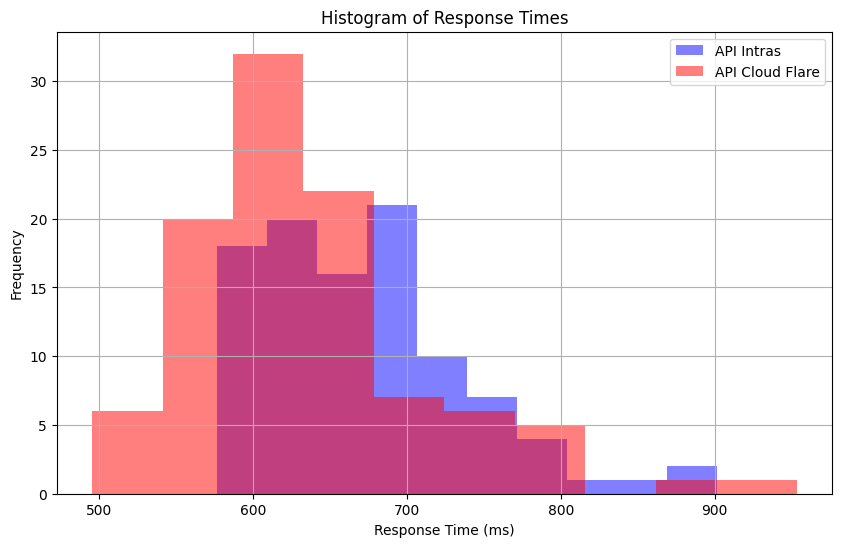

In [124]:
plot_histogram(response_times, url_data)

#### Analysis of the results

Here we can see a pretty close overall tendency of both APIs. We need more information about those two APIs.

### Boxplots of Response Times

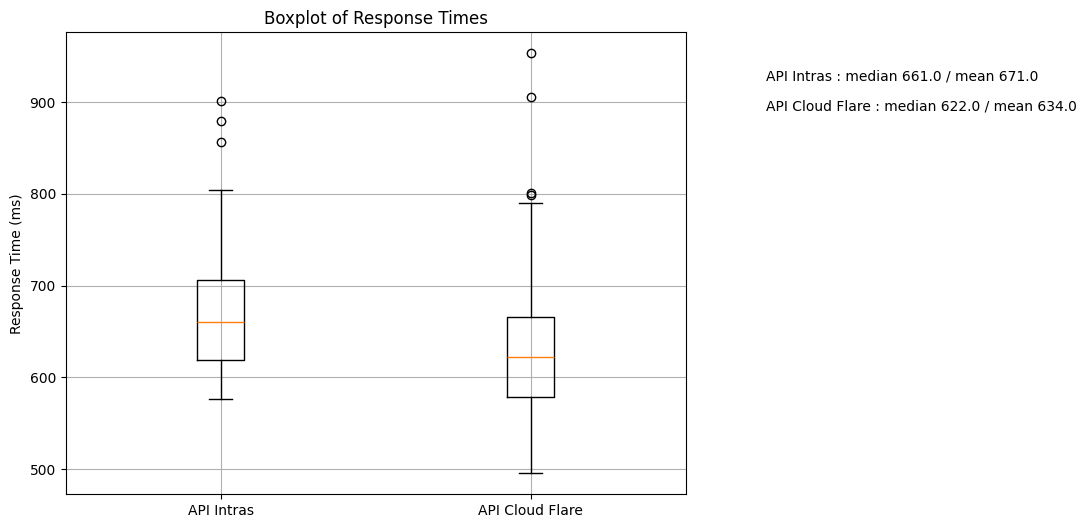

In [125]:
plot_boxplot(response_times, url_data)

### Cumulative Distribution Function (CDF) of Response Times

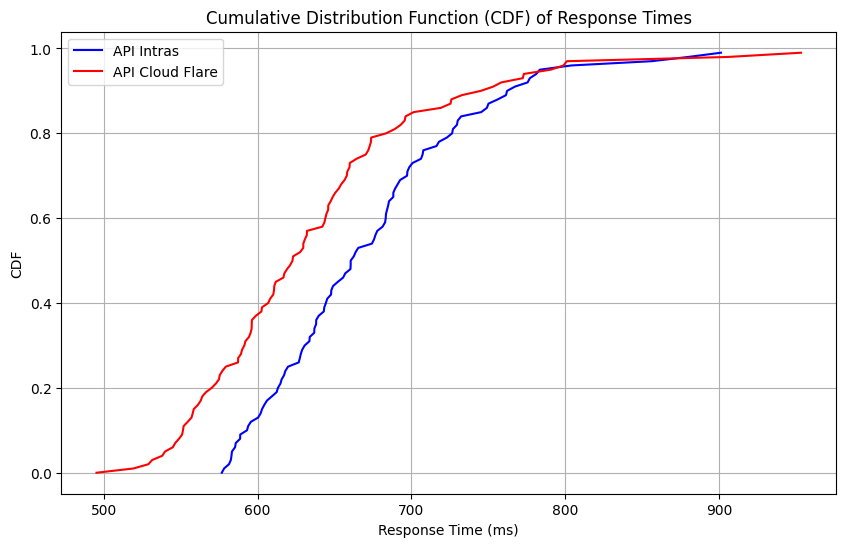

In [126]:
plot_cdf(response_times, url_data)

#### Definition of Cumulative Distribution Function 

The Cumulative Distribution Function is a concept used in statistics to describe the probability that a random variable takes the value less than or equal to a certain value.

The CDF of a random variable X is a function F(x) that gives the probability that X is less than or equal to x. Formally, for a continuous variable :

$$
F(x) = P(X \leq x)
$$

#### Analysis of the results

Here we can see that the API Intra has a CDF curve under the API Cloud Flare curve in function of the response time in seconds. 

So we can deduce that the API Cloud Flare has in general a better time response as it gets faster to 100% probability of getting the response.

### Response Times Over Time

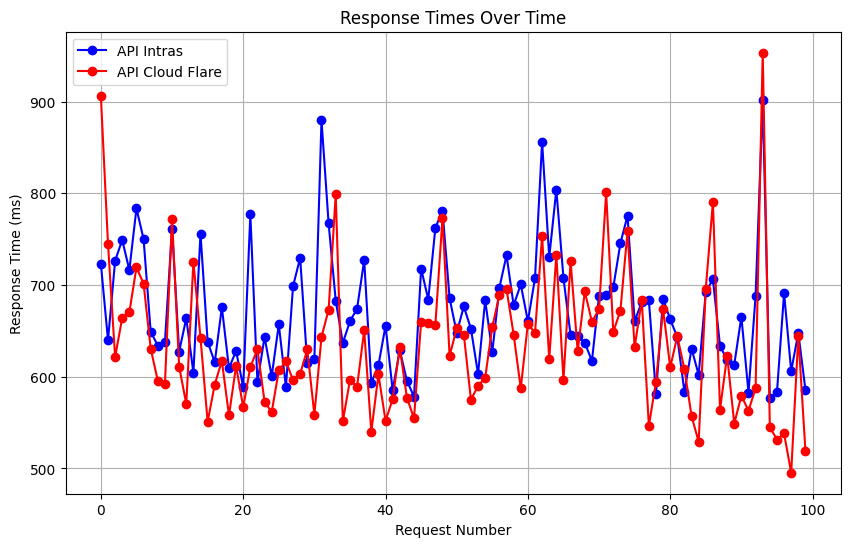

In [127]:
plot_time_series(response_times, url_data)

#### Analysis of the results

Here we can see that the highest Response times are reached by the Cloud Flare API. So even though we saw before that the Intra has a higher overall response time, the Cloud Flare API reach sometimes high time responses.

### Heatmap of Response Times

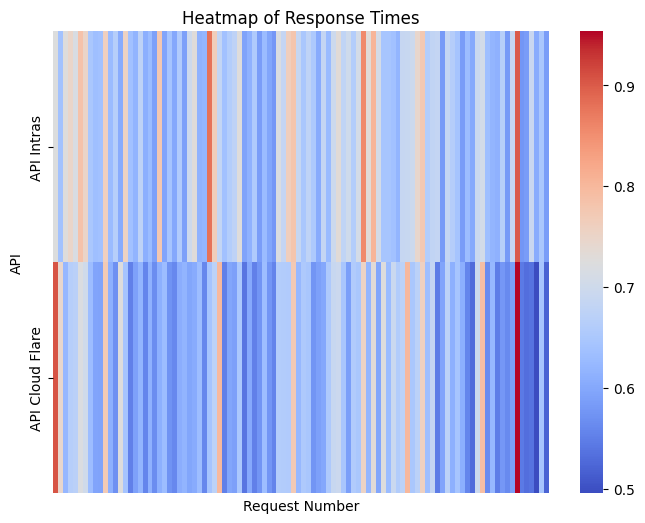

In [128]:
plot_heatmap(response_times, url_data)